**DATA LOADING From given links**

In [4]:
import requests
import json

# Define the URLs and their corresponding file paths
url_to_file_map = {
    "https://jsonkeeper.com/b/LLQT": "Current Quiz DATA_Quiz Endpoint.json",
    "https://api.jsonserve.com/rJvd7g": "Current Quiz DATA_Quiz Submission Data.json",
    "https://api.jsonserve.com/XgAgFJ": "Historical Quiz Data .json"
}

# Loop through the URLs and download the data
for url, file_path in url_to_file_map.items():
    try:
        # Fetch the JSON data with SSL verification disabled for problematic URLs
        response = requests.get(url, verify=False if "jsonkeeper.com" in url else True)
        response.raise_for_status()  # Raise an error if the request fails

        # Parse the JSON data
        data = response.json()

        # Save the JSON data to the respective file
        with open(file_path, "w") as file:
            json.dump(data, file, indent=4)

        print(f"Data downloaded and saved to '{file_path}'")
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch data from {url}: {e}")


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Data downloaded and saved to 'Current Quiz DATA_Quiz Endpoint.json'
Data downloaded and saved to 'Current Quiz DATA_Quiz Submission Data.json'
Data downloaded and saved to 'Historical Quiz Data .json'


**DATA READING**

In [6]:
import json
import pandas as pd

# File paths
current_quiz_endpoint_path = 'Current Quiz DATA_Quiz Submission Data.json'
current_quiz_submission_path = 'Current Quiz DATA_Quiz Endpoint.json'
historical_quiz_data_path = 'Historical Quiz Data .json'

# Load the JSON data
with open(current_quiz_endpoint_path, 'r') as file:
    current_quiz_endpoint = json.load(file)

with open(current_quiz_submission_path, 'r') as file:
    current_quiz_submission = json.load(file)

with open(historical_quiz_data_path, 'r') as file:
    historical_quiz_data = json.load(file)

# Convert historical data into a DataFrame for easier analysis
historical_quiz_df = pd.DataFrame(historical_quiz_data)

# Display the structure of the loaded data
{
    "Current Quiz Endpoint": current_quiz_endpoint.keys(),
    "Number of Questions in Current Quiz Submission": len(current_quiz_submission['quiz']['questions']),
    "Historical Quiz Data Columns": historical_quiz_df.columns.tolist(),
    "Number of Historical Records": len(historical_quiz_df),
}


{'Current Quiz Endpoint': dict_keys(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers', 'source', 'type', 'started_at', 'ended_at', 'duration', 'better_than', 'total_questions', 'rank_text', 'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz', 'next_steps']),
 'Number of Questions in Current Quiz Submission': 128,
 'Historical Quiz Data Columns': ['id',
  'quiz_id',
  'user_id',
  'submitted_at',
  'created_at',
  'updated_at',
  'score',
  'trophy_level',
  'accuracy',
  'speed',
  'final_score',
  'negative_score',
  'correct_answers',
  'incorrect_answers',
  'source',
  'type',
  'started_at',
  'ended_at',
  'duration',
  'better_than',
  'total_questions',
  'rank_text',
  'mistakes_corrected',
  'initial_mistake_count',
  'response_map',
  'quiz'],
 'Number of Historical Records': 14}

**QUIZ_DATA_ANALYSIS**

In [7]:
# Extract data for analysis

# Current Quiz Analysis: Extract topic and response accuracy
current_quiz_questions = current_quiz_submission['quiz']['questions']
current_response_map = current_quiz_endpoint['response_map']

# Historical Quiz Analysis: Extract topic and accuracy trends
historical_quiz_topics = [quiz['quiz']['topic'] for quiz in historical_quiz_data]
historical_response_maps = [quiz['response_map'] for quiz in historical_quiz_data]
historical_scores = [quiz['score'] for quiz in historical_quiz_data]
historical_accuracies = [quiz['accuracy'] for quiz in historical_quiz_data]

# Analyze accuracy by topic in historical data
topic_accuracy = {}
for quiz in historical_quiz_data:
    topic = quiz['quiz']['topic']
    correct_answers = quiz['correct_answers']
    total_questions = quiz['total_questions']
    accuracy = correct_answers / total_questions if total_questions > 0 else 0
    if topic not in topic_accuracy:
        topic_accuracy[topic] = []
    topic_accuracy[topic].append(accuracy)

# Aggregate topic accuracies
topic_accuracy_summary = {topic: sum(accs) / len(accs) for topic, accs in topic_accuracy.items()}

# Compile insights for current quiz performance
current_quiz_summary = {
    "Total Questions": len(current_quiz_questions),
    "Correct Answers": current_quiz_endpoint['correct_answers'],
    "Incorrect Answers": current_quiz_endpoint['incorrect_answers'],
    "Accuracy (%)": current_quiz_endpoint['accuracy'],
}

# Generate summary of difficulty (if available in questions)
difficulty_levels = {}
for question in current_quiz_questions:
    difficulty = question.get('difficulty_level', 'Unknown')
    if difficulty not in difficulty_levels:
        difficulty_levels[difficulty] = 0
    difficulty_levels[difficulty] += 1

# Output analysis results
{
    "Current Quiz Summary": current_quiz_summary,
    "Historical Topic Accuracy Summary": topic_accuracy_summary,
    "Question Difficulty Distribution": difficulty_levels,
    "Historical Performance Trends": {
        "Scores": historical_scores,
        "Accuracies": historical_accuracies,
    },
}


{'Current Quiz Summary': {'Total Questions': 128,
  'Correct Answers': 8,
  'Incorrect Answers': 2,
  'Accuracy (%)': '80 %'},
 'Historical Topic Accuracy Summary': {'Body Fluids and Circulation': 0.21666666666666667,
  'Body Fluids and Circulation ': 0.5942028985507246,
  'Human Reproduction': 0.11235955056179775,
  'principles of inheritance and variation ': 0.05084745762711865,
  'microbes in human welfare': 0.95,
  'reproductive health ': 0.5909090909090909,
  'human health and disease ': 0.6829268292682927,
  'Reproductive Health': 0.23636363636363636,
  'Respiration and Gas Exchange': 0.06},
 'Question Difficulty Distribution': {None: 128},
 'Historical Performance Trends': {'Scores': [108,
   92,
   116,
   36,
   36,
   40,
   36,
   12,
   76,
   40,
   112,
   64,
   52,
   24],
  'Accuracies': ['90 %',
   '100 %',
   '96 %',
   '90 %',
   '31 %',
   '38 %',
   '50 %',
   '30 %',
   '100 %',
   '100 %',
   '93 %',
   '84 %',
   '43 %',
   '66 %']}}

**QUIZ_DATA_VISUALIZATION**

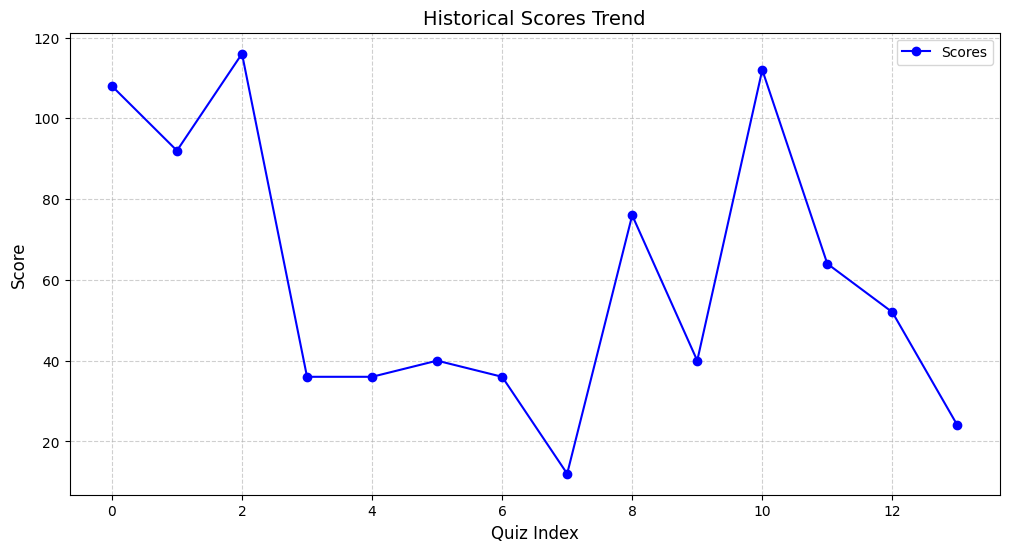

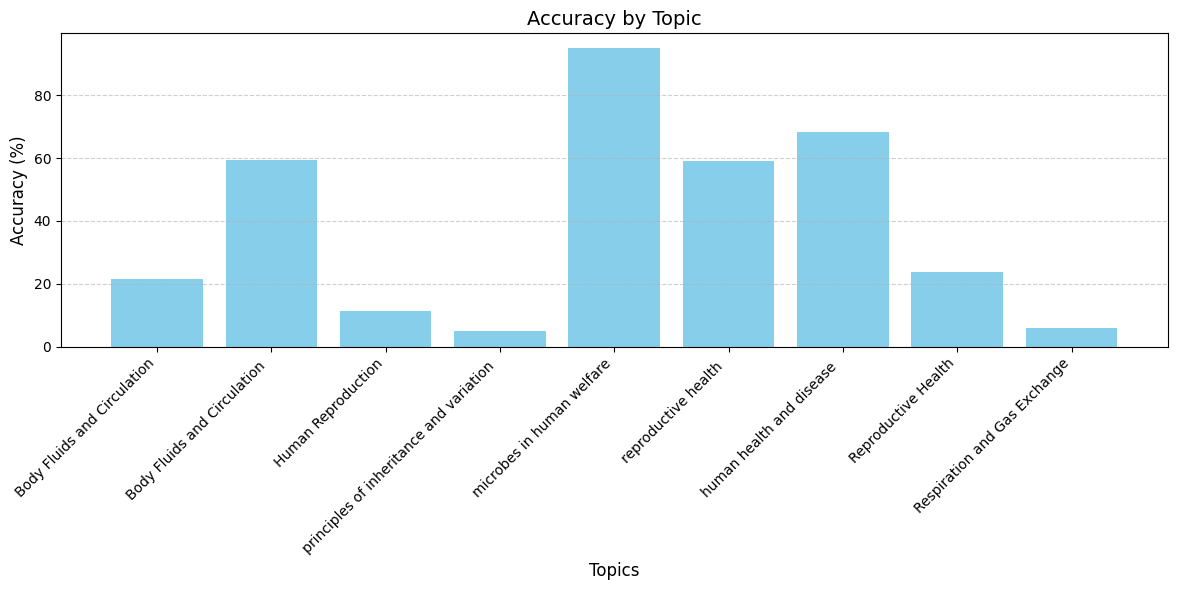

In [8]:
import matplotlib.pyplot as plt

# Prepare data for plotting
# Historical Performance Trends
scores = historical_scores
accuracies = [float(acc.strip('%')) for acc in historical_accuracies if isinstance(acc, str)]

# Historical Topic Accuracy
topics = list(topic_accuracy_summary.keys())
accuracies_by_topic = [accuracy * 100 for accuracy in topic_accuracy_summary.values()]

# Question Difficulty Distribution
difficulty_labels = list(difficulty_levels.keys())
difficulty_counts = list(difficulty_levels.values())

# Plot 1: Historical Scores Trend
plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), scores, marker='o', label='Scores', color='b')
plt.title("Historical Scores Trend", fontsize=14)
plt.xlabel("Quiz Index", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plot 2: Accuracy by Topic
plt.figure(figsize=(12, 6))
plt.bar(topics, accuracies_by_topic, color='skyblue')
plt.title("Accuracy by Topic", fontsize=14)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**HISTORICAL QUIZ DATA ANALYSIS**

In [9]:
# Identify weak areas by analyzing historical topic accuracy
weak_areas = {
    topic: accuracy for topic, accuracy in topic_accuracy_summary.items() if accuracy < 0.3
}

# Identify improvement trends by analyzing historical scores and accuracies
improvement_trends = {
    "Best Performance (Max Score)": max(historical_scores),
    "Worst Performance (Min Score)": min(historical_scores),
    "Consistency in Accuracy": [
        (quiz['quiz']['topic'], quiz['accuracy'])
        for quiz in historical_quiz_data if quiz['accuracy']
    ],
}

# Identify performance gaps (topics with significant variation)
performance_gaps = {
    "High Performance Topics": {
        topic: accuracy
        for topic, accuracy in topic_accuracy_summary.items() if accuracy > 0.6
    },
    "Low Performance Topics": weak_areas,
    "Score Range": {
        "Max Score": max(historical_scores),
        "Min Score": min(historical_scores),
    },
}

# Combine all insights
insights = {
    "Weak Areas": weak_areas,
    "Improvement Trends": improvement_trends,
    "Performance Gaps": performance_gaps,
}

# Output the insights
insights


{'Weak Areas': {'Body Fluids and Circulation': 0.21666666666666667,
  'Human Reproduction': 0.11235955056179775,
  'principles of inheritance and variation ': 0.05084745762711865,
  'Reproductive Health': 0.23636363636363636,
  'Respiration and Gas Exchange': 0.06},
 'Improvement Trends': {'Best Performance (Max Score)': 116,
  'Worst Performance (Min Score)': 12,
  'Consistency in Accuracy': [('Body Fluids and Circulation', '90 %'),
   ('Body Fluids and Circulation ', '100 %'),
   ('Body Fluids and Circulation', '96 %'),
   ('Body Fluids and Circulation ', '90 %'),
   ('Body Fluids and Circulation', '31 %'),
   ('Human Reproduction', '38 %'),
   ('Body Fluids and Circulation ', '50 %'),
   ('principles of inheritance and variation ', '30 %'),
   ('microbes in human welfare', '100 %'),
   ('reproductive health ', '100 %'),
   ('human health and disease ', '93 %'),
   ('reproductive health ', '84 %'),
   ('Reproductive Health', '43 %'),
   ('Respiration and Gas Exchange', '66 %')]},
 'P

**HISTORICAL QUIZ DATA visualization**

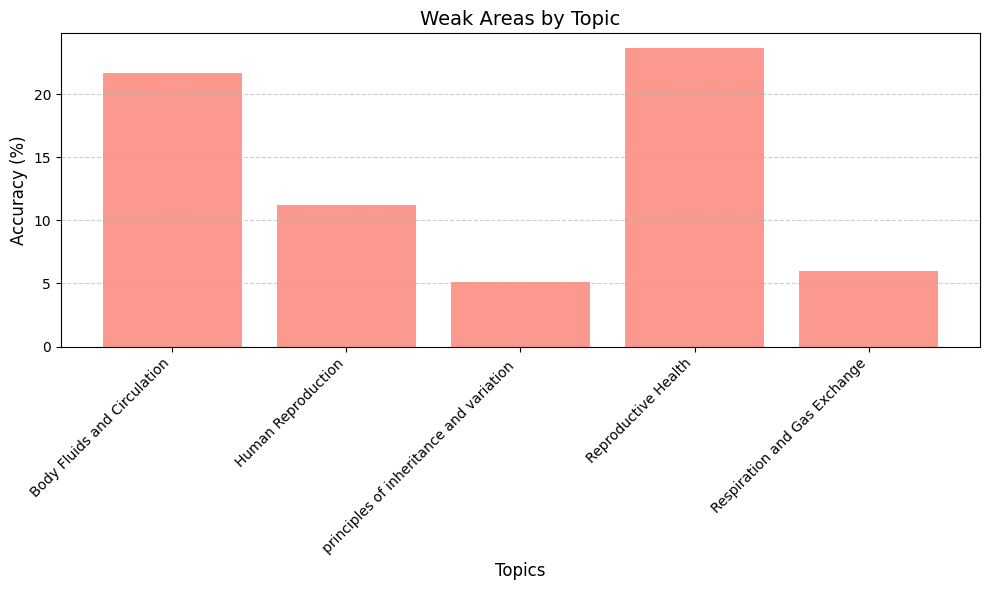

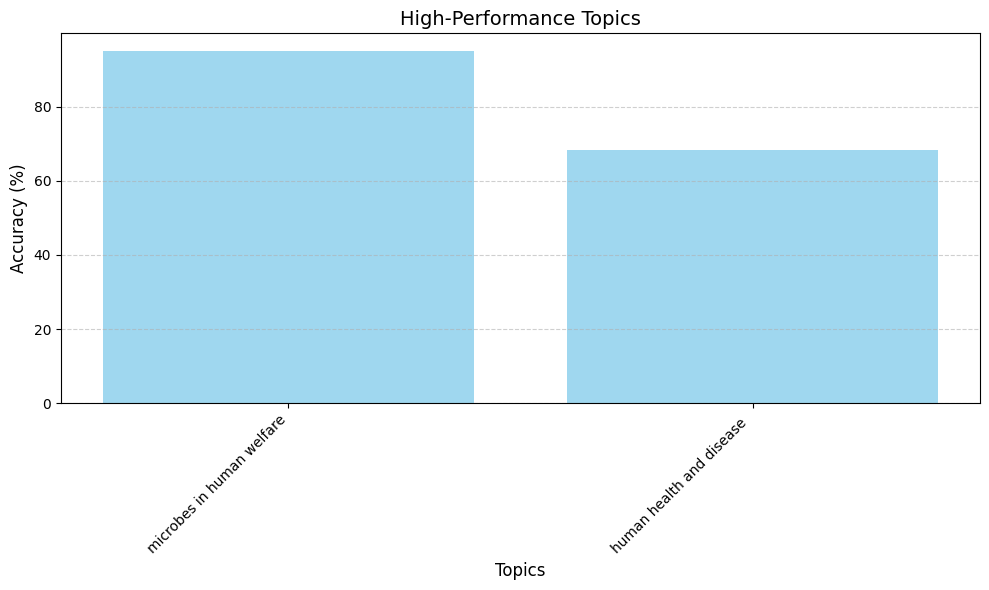

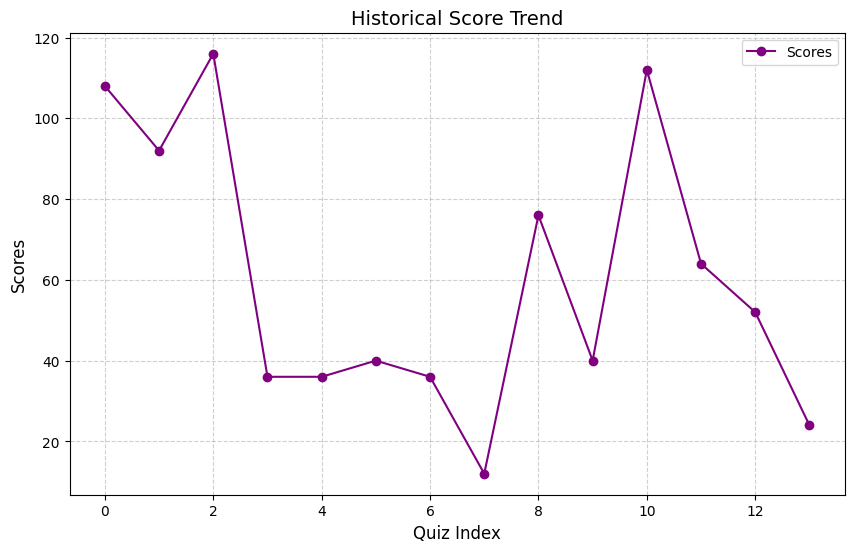

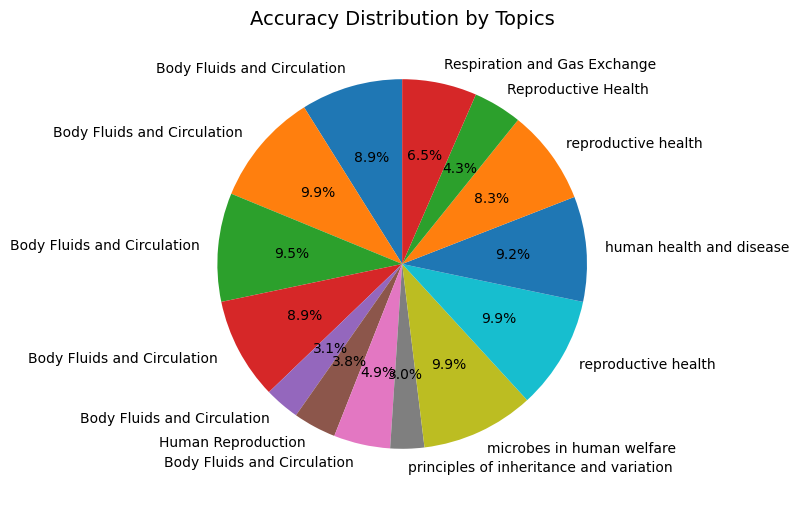

In [10]:
import matplotlib.pyplot as plt

# Data preparation
# Weak Areas
weak_topics = list(weak_areas.keys())
weak_accuracies = [accuracy * 100 for accuracy in weak_areas.values()]

# High Performance Topics
high_topics = list(performance_gaps["High Performance Topics"].keys())
high_accuracies = [accuracy * 100 for accuracy in performance_gaps["High Performance Topics"].values()]

# Score Range
scores = historical_scores

# Plot 1: Weak Areas by Topic
plt.figure(figsize=(10, 6))
plt.bar(weak_topics, weak_accuracies, color='salmon', alpha=0.8)
plt.title("Weak Areas by Topic", fontsize=14)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: High-Performance Topics
plt.figure(figsize=(10, 6))
plt.bar(high_topics, high_accuracies, color='skyblue', alpha=0.8)
plt.title("High-Performance Topics", fontsize=14)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 3: Historical Score Trend
plt.figure(figsize=(10, 6))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='purple', label='Scores')
plt.title("Historical Score Trend", fontsize=14)
plt.xlabel("Quiz Index", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Plot 4: Accuracy Consistency Pie Chart
accuracy_values = [float(acc.strip('%')) for _, acc in improvement_trends["Consistency in Accuracy"] if isinstance(acc, str)]
plt.figure(figsize=(8, 6))
plt.pie(
    accuracy_values,
    labels=[topic for topic, _ in improvement_trends["Consistency in Accuracy"]],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab10.colors
)
plt.title("Accuracy Distribution by Topics", fontsize=14)
plt.show()


**Recommendations**

In [11]:
# Generate Recommendations Based on Analysis

def generate_recommendations(insights, current_quiz_summary):
    recommendations = []

    # 1. Focus on Weak Areas
    weak_areas = insights["Weak Areas"]
    if weak_areas:
        recommendations.append("*****Focus on Weak Areas:*****")
        for topic, accuracy in weak_areas.items():
            recommendations.append(
                f"- Topic: {topic} | Current Accuracy: {accuracy * 100:.1f}%"
                " | Suggested Action: Revise foundational concepts and practice targeted questions."
            )

    # 2. Leverage Strengths
    high_performance_topics = insights["Performance Gaps"]["High Performance Topics"]
    if high_performance_topics:
        recommendations.append("*****Leverage Your Strengths:*****")
        for topic, accuracy in high_performance_topics.items():
            recommendations.append(
                f"- Topic: {topic} | Accuracy: {accuracy * 100:.1f}%"
                " | Suggested Action: Use these topics to maintain confidence and improve overall scores."
            )

    # 3. Time Management and Consistency
    score_range = insights["Performance Gaps"]["Score Range"]
    if score_range["Max Score"] - score_range["Min Score"] > 50:
        recommendations.append(
            "**Improve Consistency:**"
            "Your scores fluctuate significantly. Focus on consistent preparation and ensure balanced time across all topics."
        )

    # 4. Difficulty Levels (if available)
    difficulty_distribution = current_quiz_summary.get("Question Difficulty Distribution", {})
    if "Unknown" in difficulty_distribution or None in difficulty_distribution:
        recommendations.append(
            "**Address All Difficulty Levels:**"
            "Difficulty levels for questions in the quiz are unknown. Ensure you attempt quizzes with a variety of difficulty levels to enhance adaptability."
        )

    # 5. General Practice Strategy
    recommendations.append(
        "**Practice Strategy:**"
        "- Allocate time to weak areas and ensure daily revision."
        "- Take mock tests focusing on topics like 'Respiration and Gas Exchange' and 'Inheritance.'"
        "- Use spaced repetition techniques to retain challenging concepts."
    )

    return recommendations


# Generate Recommendations
recommendations = generate_recommendations(insights, current_quiz_summary)

# Display Recommendations
recommendations


['*****Focus on Weak Areas:*****',
 '- Topic: Body Fluids and Circulation | Current Accuracy: 21.7% | Suggested Action: Revise foundational concepts and practice targeted questions.',
 '- Topic: Human Reproduction | Current Accuracy: 11.2% | Suggested Action: Revise foundational concepts and practice targeted questions.',
 '- Topic: principles of inheritance and variation  | Current Accuracy: 5.1% | Suggested Action: Revise foundational concepts and practice targeted questions.',
 '- Topic: Reproductive Health | Current Accuracy: 23.6% | Suggested Action: Revise foundational concepts and practice targeted questions.',
 '- Topic: Respiration and Gas Exchange | Current Accuracy: 6.0% | Suggested Action: Revise foundational concepts and practice targeted questions.',
 '*****Leverage Your Strengths:*****',
 '- Topic: microbes in human welfare | Accuracy: 95.0% | Suggested Action: Use these topics to maintain confidence and improve overall scores.',
 '- Topic: human health and disease  | Ac

**Student Persona , Returning Output in json Format**

In [13]:
import json

# Define function to analyze and define the student's persona
def define_student_persona(topic_accuracy_summary, historical_scores):
    """
    Analyze student performance to define their persona.

    Parameters:
    - topic_accuracy_summary: A dictionary with topic-wise accuracy percentages.
    - historical_scores: A list of historical scores.

    Returns:
    - persona: A dictionary summarizing the student's strengths, weaknesses, and labels.
    """
    # Define thresholds for strengths and weaknesses
    high_threshold = 0.7  # Topics with accuracy >= 70% are strengths
    low_threshold = 0.3   # Topics with accuracy <= 30% are weaknesses

    # Categorize topics based on performance
    strengths = {topic: acc for topic, acc in topic_accuracy_summary.items() if acc >= high_threshold}
    weaknesses = {topic: acc for topic, acc in topic_accuracy_summary.items() if acc <= low_threshold}

    # Analyze score consistency
    score_range = max(historical_scores) - min(historical_scores)
    consistent = score_range <= 30  # Scores within a 30-point range are considered consistent

    # Define persona based on performance
    if len(strengths) > len(weaknesses) and consistent:
        persona_label = "The Consistent Climber"
        persona_description = "Shows steady improvement with consistent performance and strong mastery of key topics."
    elif len(weaknesses) > len(strengths):
        persona_label = "The Foundation Seeker"
        persona_description = "Struggles with foundational topics; needs to build a solid knowledge base."
    else:
        persona_label = "The Topic Juggler"
        persona_description = "Exhibits wide score fluctuations and uneven performance across topics."

    # Compile persona summary
    persona = {
        "Persona Label": persona_label,
        "Description": persona_description,
        "Strengths": strengths,
        "Weaknesses": weaknesses,
        "Score Consistency": "Consistent" if consistent else "Inconsistent",
        "Score Range": {"Min Score": min(historical_scores), "Max Score": max(historical_scores)},
    }

    # Convert the persona dictionary to JSON format
    return json.dumps(persona)

# Inputs derived from dataset analysis
historical_scores = historical_quiz_df['score']
topic_accuracy_summary = {
    "Body Fluids and Circulation": 0.21666666666666667,
    "Body Fluids and Circulation ": 0.5942028985507246,
    "Human Reproduction": 0.11235955056179775,
    "principles of inheritance and variation ": 0.05084745762711865,
    "microbes in human welfare": 0.95,
    "reproductive health ": 0.5909090909090909,
    "human health and disease ": 0.6829268292682927,
    "Reproductive Health": 0.23636363636363636,
    "Respiration and Gas Exchange": 0.06,
}

# Define the student persona
student_persona = define_student_persona(topic_accuracy_summary, historical_scores)

# Return the persona details in JSON format
student_persona


'{"Persona Label": "The Foundation Seeker", "Description": "Struggles with foundational topics; needs to build a solid knowledge base.", "Strengths": {"microbes in human welfare": 0.95}, "Weaknesses": {"Body Fluids and Circulation": 0.21666666666666667, "Human Reproduction": 0.11235955056179775, "principles of inheritance and variation ": 0.05084745762711865, "Reproductive Health": 0.23636363636363636, "Respiration and Gas Exchange": 0.06}, "Score Consistency": "Inconsistent", "Score Range": {"Min Score": 12, "Max Score": 116}}'